In [1]:
# Importing Libraries
import sys
import re, numpy as np, pandas as pd
from pprint import pprint
import nltk
import gensim
from nltk.stem import WordNetLemmatizer

In [2]:
# Load the data 
df = pd.read_csv("/BBCBreaking data.csv")
#Reading the data
df.head()

,Published date,tweet
0,2021-06-30 19:33:34,"Former US defence secretary Donald Rumsfeld, o..."
1,2021-06-30 17:04:50,US comedian Bill Cosby's sex assault convictio...
2,2021-06-29 17:51:47,RT @BBCSport: ENGLAND HAVE DONE IT! 🔥\n\n#ENG ...
3,2021-06-29 13:08:13,Foreign business leaders no longer need to qua...
4,2021-06-29 09:51:30,South Africa's former President Jacob Zuma sen...


In [3]:
# Removing column
df = df.drop(columns=['Published date'],axis=1)

df.head()

,tweet
0,"Former US defence secretary Donald Rumsfeld, o..."
1,US comedian Bill Cosby's sex assault convictio...
2,RT @BBCSport: ENGLAND HAVE DONE IT! 🔥\n\n#ENG ...
3,Foreign business leaders no longer need to qua...
4,South Africa's former President Jacob Zuma sen...


In [4]:
data = list(df.loc[:,'tweet'].values)

In [5]:
data

['Former US defence secretary Donald Rumsfeld, one of the main architects of the Iraq war, dies at 88 https://t.co/N4jvaDkaPi',
 "US comedian Bill Cosby's sex assault conviction overturned by top Pennsylvania court, paving the way for his release https://t.co/9JFWX1X66o",
 "RT @BBCSport: ENGLAND HAVE DONE IT! 🔥\n\n#ENG 2-0 #GER\n\nRaheem Sterling and Harry Kane's goals secure England's place in the quarter-finals o…",
 'Foreign business leaders no longer need to quarantine when arriving in England if trip likely to have significant e… https://t.co/8OqCsrkYAC',
 "South Africa's former President Jacob Zuma sentenced to 15 months in prison by highest court in the country https://t.co/vBvk5TXm6T",
 'Any combination of Pfizer or AstraZeneca Covid vaccine doses gives good protection against coronavirus, UK study su… https://t.co/18Ldt2NfE3',
 'Classified government documents containing details about warship HMS Defender and the British military in Afghanist… https://t.co/V0QyhJgwNL',
 'Forme

### Data Preprecessing

Removing the web site links, new line characters, single quotes and finally split the sentence into a list of words using tokkenization and Lemmantizing

In [6]:
# Stopwords for preprocessing
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

stemmer = WordNetLemmatizer()

# creating function for preprocess the data

def preprocessed_text(document):
  # Removing all the special character
  document = re.sub(r'\W',' ',str(document))
  # Removing all single character
  document = re.sub(r'\s+[a-zA-Z]\s+',' ', document)
  # Removing single character from the start
  document = re.sub(r'\^[a-zA-Z]\s+',' ',document)
  # substituting multiple spaces with single spaces
  document = re.sub(r'\s+',' ',document,flags=re.I)
  # Removing prefixed 
  document = re.sub(r'^b\s+', '' , document)
  # Converting to lowercase
  document = document.lower()
  # Lemmentization
  tokens = document.split()
  tokens = [stemmer.lemmatize(word) for word in tokens]
  tokens = [word for word in tokens if word not in en_stop]
  tokens = [word for word in tokens if len(word)>5]
  return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Applying data into created function
nltk.download('wordnet')
data_words = []
for docu in data:
  tokens = preprocessed_text(docu)
  data_words.append(tokens)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
data_words[0]

['former',
 'defence',
 'secretary',
 'donald',
 'rumsfeld',
 'architect',
 'n4jvadkapi']

In [9]:
# Create Dictionary
from gensim import  corpora
id2word = corpora.Dictionary(data_words)

TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

In [10]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_words]

Latent Dirichlet Allocation (LDA) assumes that each document is generated by a statistical generative process.  That is, each document is a mix of topics, and each topic is a mix of words.

In [11]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [12]:
# Topics
from pprint import pprint 
pprint(lda_model.print_topics())

[(0,
  '0.038*"police" + 0.019*"attack" + 0.019*"killed" + 0.018*"london" + '
  '0.015*"official" + 0.012*"poisoning" + 0.011*"jailed" + 0.010*"chemical" + '
  '0.008*"murder" + 0.008*"skripal"'),
 (1,
  '0.032*"bbcsport" + 0.028*"report" + 0.020*"medium" + 0.014*"donald" + '
  '0.011*"champion" + 0.010*"supermarket" + 0.009*"charge" + 0.009*"resigns" + '
  '0.008*"australia" + 0.008*"england"'),
 (2,
  '0.030*"russian" + 0.022*"leader" + 0.019*"russia" + 0.011*"france" + '
  '0.010*"cambridge" + 0.009*"office" + 0.009*"secretary" + 0.009*"austin" + '
  '0.008*"strike" + 0.008*"situation"'),
 (3,
  '0.033*"president" + 0.031*"people" + 0.014*"french" + 0.013*"guilty" + '
  '0.013*"diplomat" + 0.012*"former" + 0.011*"hospital" + 0.009*"explosion" + '
  '0.009*"person" + 0.008*"germany"')]


In [13]:
# Dominant topic and its percentage contribution in each document
# The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.4666,"russian, leader, russia, france, cambridge, of...","[former, defence, secretary, donald, rumsfeld,..."
1,1,0.0,0.4545,"police, attack, killed, london, official, pois...","[comedian, assault, conviction, overturned, pe..."
2,2,1.0,0.7851,"bbcsport, report, medium, donald, champion, su...","[bbcsport, england, raheem, sterling, secure, ..."
3,3,2.0,0.5499,"russian, leader, russia, france, cambridge, of...","[foreign, business, leader, longer, quarantine..."
4,4,3.0,0.4141,"president, people, french, guilty, diplomat, f...","[africa, former, president, sentenced, prison,..."
5,5,1.0,0.9014,"bbcsport, report, medium, donald, champion, su...","[combination, pfizer, astrazeneca, vaccine, pr..."
6,6,3.0,0.7631,"president, people, french, guilty, diplomat, f...","[classified, government, document, containing,..."
7,7,2.0,0.6500,"russian, leader, russia, france, cambridge, of...","[former, chancellor, secretary, replace, hanco..."
8,8,1.0,0.8448,"bbcsport, report, medium, donald, champion, su...","[bbcsport, outplayed, denmark, heading]"
9,9,1.0,0.8030,"bbcsport, report, medium, donald, champion, su...","[resign, posted, nygzng13no]"


In [14]:
# The most representative sentence for each topic
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9407,"police, attack, killed, london, official, poisoning, jailed, chemical, murder, skripal","[charged, attempted, murder, possessing, offensive, weapon, london, attack, injured, police, off..."
1,1.0,0.9302,"bbcsport, report, medium, donald, champion, supermarket, charge, resigns, australia, england","[bbcsport, serena, williams, absolutely, stormed, wimbledon, beaten, barbora, strycova, bbcone]"
2,2.0,0.9317,"russian, leader, russia, france, cambridge, office, secretary, austin, strike, situation","[conservative, congress, impeachment, process, effort, deputy, attorney, general, rosenstein, hb..."
3,3.0,0.9425,"president, people, french, guilty, diplomat, former, hospital, explosion, person, germany","[single, either, oxford, astrazeneca, pfizer, biontech, vaccine, reduces, chance, needing, hospi..."


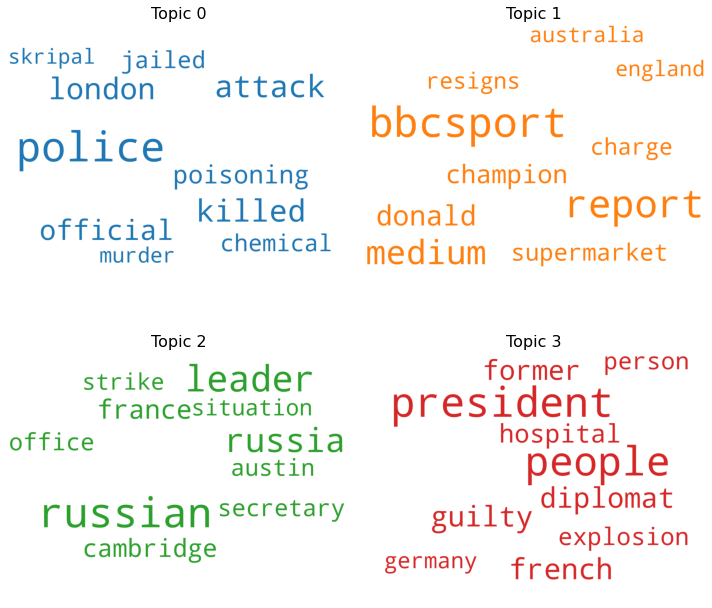

In [15]:
# Wordcloud of Top words in each topic
# The topic keywords in each topic
# A word cloud with the size of the words proportional to the weight is a pleasant sight

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

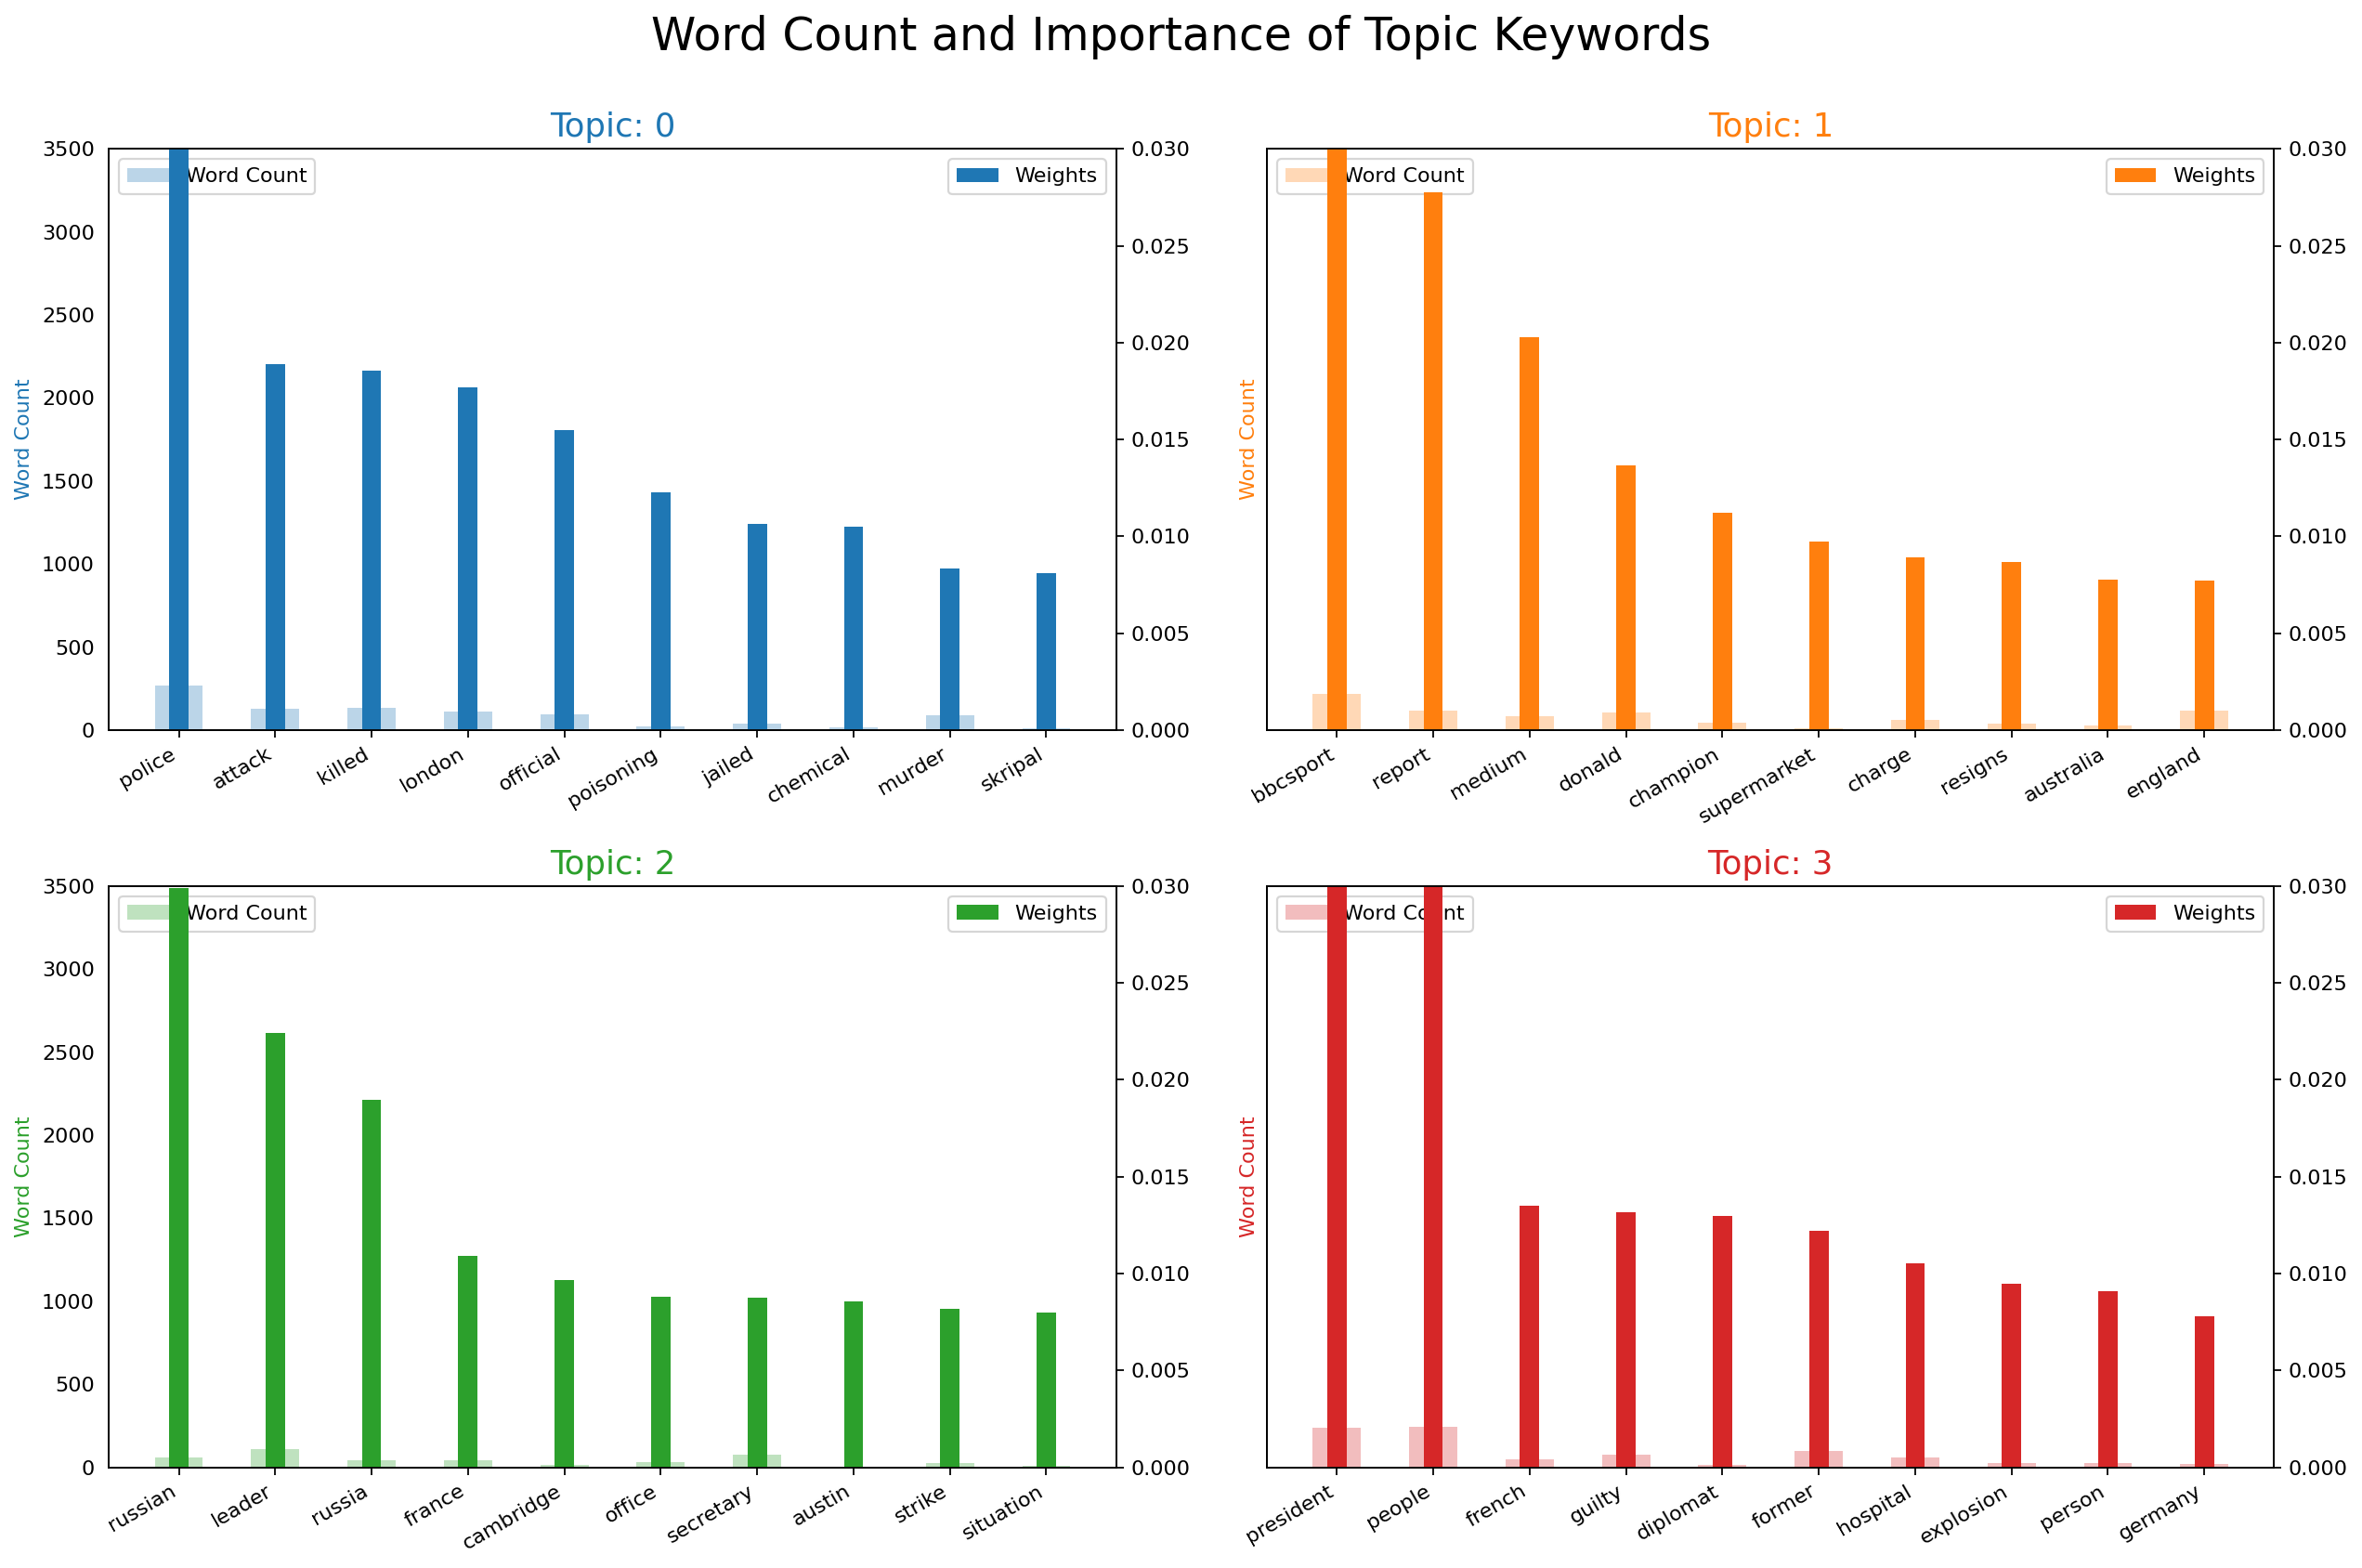

In [16]:
# Word Counts of Topic Keywords
# When it comes to the keywords in the topics,the importance (weights) of the keywords matters.
# Along with that, see how frequently the words have appeared in the documents 

from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

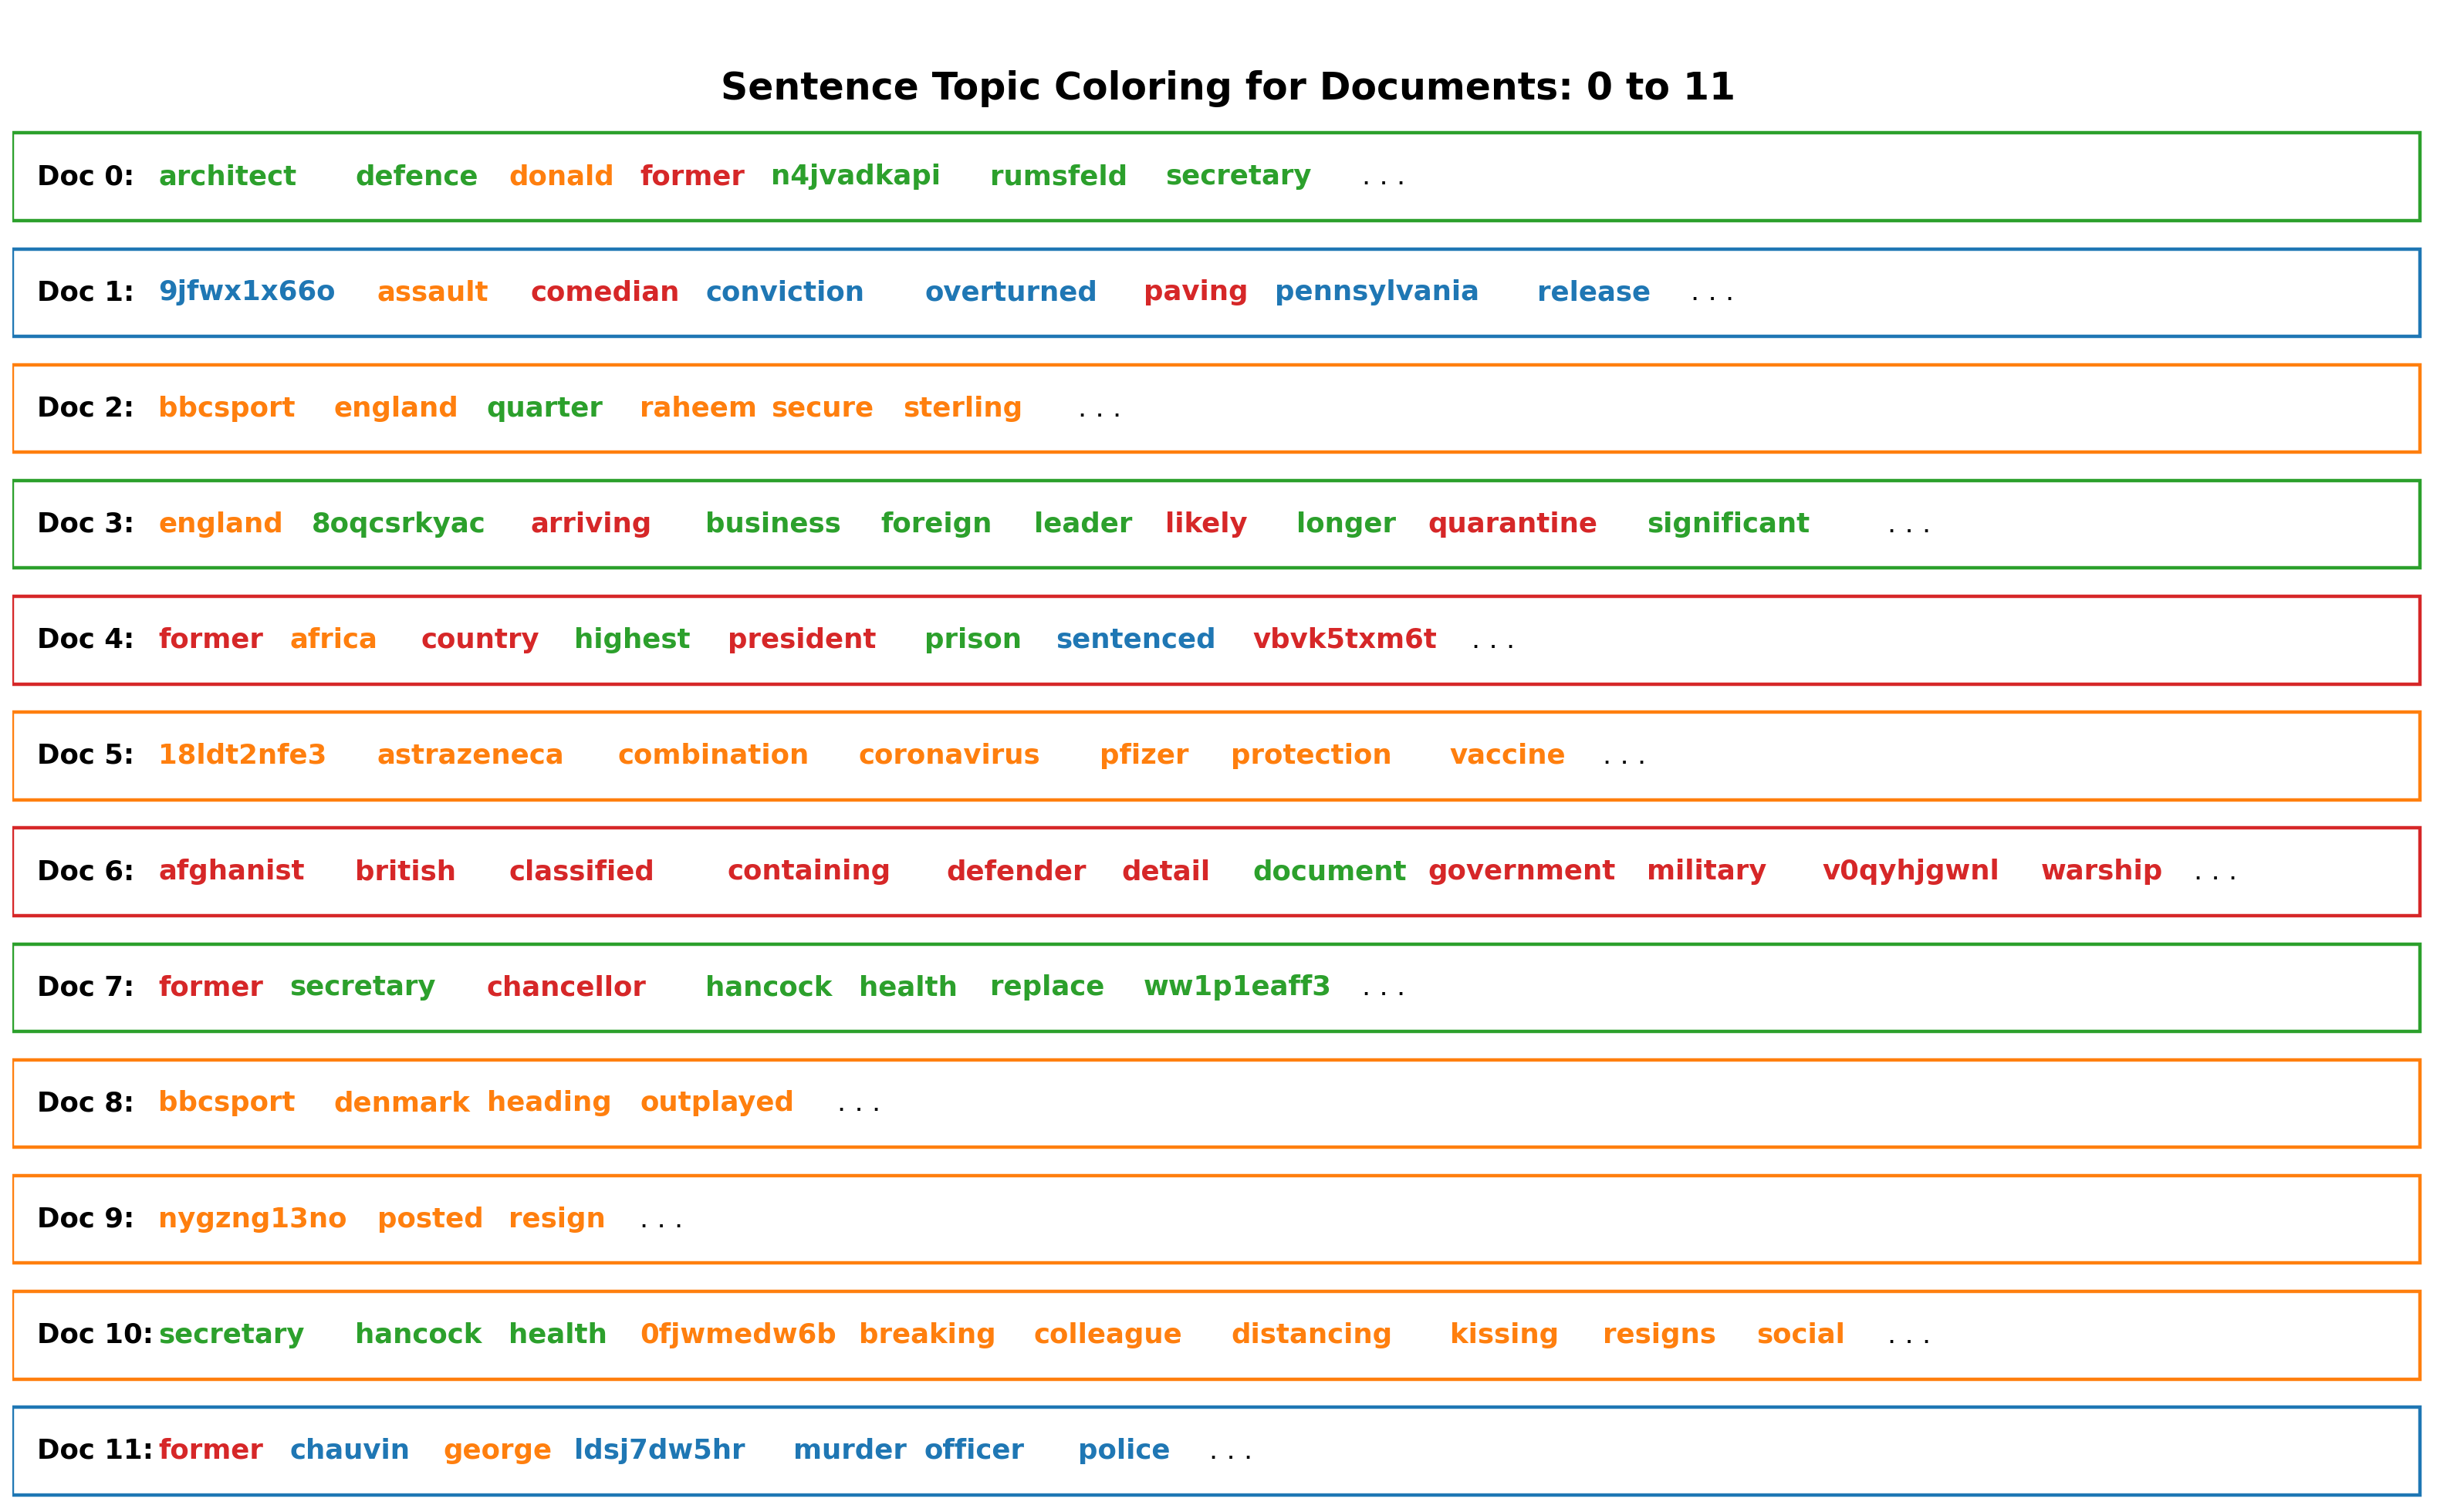

In [17]:
# Sentence Coloring of Sentences
# Each word in the document is representative of one of the 4 topics.
# color each word in the given documents by the topic id it is attributed to

from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()   

In [18]:
!pip install pyLDAvis

pyLDAVis is the most commonly used and a nice way to visualise the information contained in a topic model

In [19]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.150235  0.156286       1        1  26.115727
0     -0.235558  0.072618       2        1  26.066473
3      0.019615 -0.188028       3        1  24.489868
2      0.065708 -0.040876       4        1  23.327932, topic_info=           Term        Freq       Total Category  logprob  loglift
78       police  239.000000  239.000000  Default  30.0000  30.0000
33    president  191.000000  191.000000  Default  29.0000  29.0000
15     bbcsport  199.000000  199.000000  Default  28.0000  28.0000
262      people  184.000000  184.000000  Default  27.0000  27.0000
489     russian  167.000000  167.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
659     station   18.923692   19.889573   Topic4  -5.6897   1.4057
1748     michel   22.757652   24.909448   Topic4  -5.5052   1.3652
7514  analytica   35.247113   42.089664   Topic4  -5.0677   1.2781
1747    barnier   22.577750   24.885044   Topic4  -5.5131   1.3582
1171    hostage   29.448364   63.805808   Topic4  -5.2474   0.6823

[177 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
463       1  0.984407     action
361       4  0.971699     agency
1826      4  0.980046    alleged
7514      3  0.142553  analytica
7514      4  0.831558  analytica
...     ...       ...        ...
1095      2  0.967287   teenager
447       2  0.983229     victim
2474      2  0.869269     weapon
2474      4  0.111445     weapon
642       3  0.973733     worker

[178 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3])